In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [8]:
# Reading the results file
from ema_workbench import load_results
file_name = 'randompolicies.tar.gz'
results = load_results(file_name)
# Extracting experiment and outcomes from results
experiments, outcomes = results

20 randomly generated policies with 100 scenarios

D:\degen\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\degen\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\degen\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\degen\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\degen\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\degen\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping dens

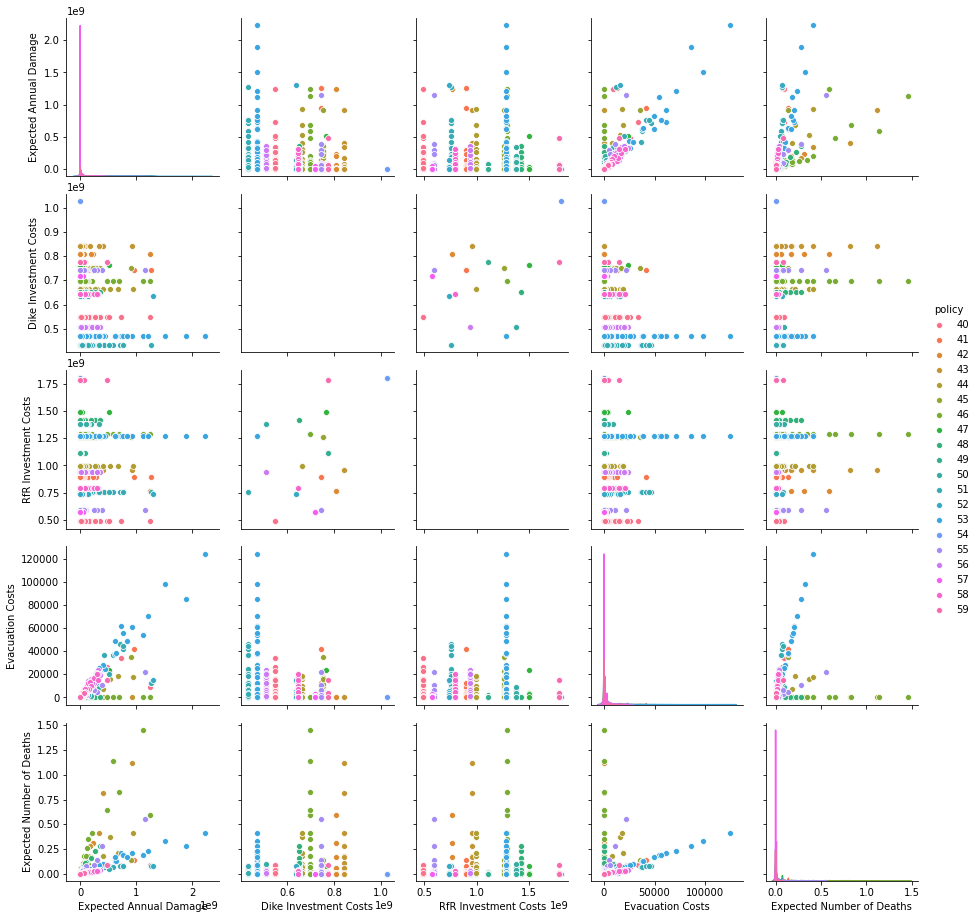

In [9]:
experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

In [19]:
outcomes

{'Expected Annual Damage': array([1.10598412e+07, 1.68208402e+07, 1.95107545e+08, ...,
        8.97373639e+04, 6.46684046e+07, 3.16835512e+05]),
 'Dike Investment Costs': array([5.46928372e+08, 5.46928372e+08, 5.46928372e+08, ...,
        7.75147338e+08, 7.75147338e+08, 7.75147338e+08]),
 'RfR Investment Costs': array([4.8500e+08, 4.8500e+08, 4.8500e+08, ..., 1.7905e+09, 1.7905e+09,
        1.7905e+09]),
 'Evacuation Costs': array([5.42481983e+02, 1.24607863e+03, 1.03801981e+04, ...,
        3.92338956e+00, 3.55932653e+03, 2.87047965e+01]),
 'Expected Number of Deaths': array([1.48751144e-03, 3.43913271e-03, 3.19771179e-02, ...,
        4.91679578e-06, 7.90520204e-03, 3.22366859e-05])}

In [20]:
df_outcomes = pd.DataFrame.from_dict(outcomes)

In [21]:
df_outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1.105984e+07,5.469284e+08,4.850000e+08,542.481983,0.001488
1,1.682084e+07,5.469284e+08,4.850000e+08,1246.078628,0.003439
2,1.951075e+08,5.469284e+08,4.850000e+08,10380.198107,0.031977
3,2.613533e+07,5.469284e+08,4.850000e+08,1925.787955,0.005264
4,1.991924e+08,5.469284e+08,4.850000e+08,11268.239263,0.031173
...,...,...,...,...,...
1995,1.475915e+06,7.751473e+08,1.790500e+09,109.075899,0.000124
1996,1.588839e+07,7.751473e+08,1.790500e+09,640.743929,0.003552
1997,8.973736e+04,7.751473e+08,1.790500e+09,3.923390,0.000005
1998,6.466840e+07,7.751473e+08,1.790500e+09,3559.326527,0.007905


In [22]:
total_costs = df_outcomes["Expected Annual Damage"] + df_outcomes["Dike Investment Costs"]+df_outcomes["RfR Investment Costs"]+ df_outcomes["Evacuation Costs"]

In [23]:
total_costs

0       1.042989e+09
1       1.048750e+09
2       1.227046e+09
3       1.058066e+09
4       1.231132e+09
            ...     
1995    2.567123e+09
1996    2.581536e+09
1997    2.565737e+09
1998    2.630319e+09
1999    2.565964e+09
Length: 2000, dtype: float64

In [53]:
from ema_workbench.analysis import prim

data = df_outcomes["Expected Annual Damage"]

y = data <= np.percentile(data, 20)

prim_alg = prim.Prim(experiments,y, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()

In [55]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.539455
density     0.824561
id                20
mass           0.228
mean        0.824561
res_dim            6
Name: 20, dtype: object

                                                               box 20  \
                                                                  min   
policy              {40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 5...   
A.2_DikeIncrease 0                                                  3   
A.4_pfail                                                    0.322746   
A.3_pfail                                                    0.100627   
A.5_DikeIncrease 0                                                  2   
A.5_pfail                                                   0.0407416   

                                                                       \
                                                                  max   
policy              {40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 5...   
A.2_DikeIncrease 0                           

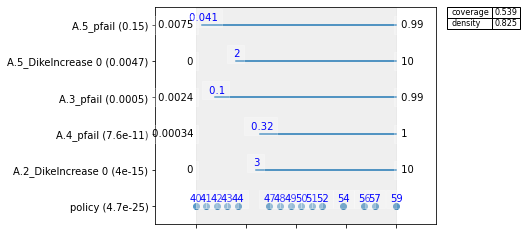

In [58]:
box1.inspect(20)
box1.inspect(20, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

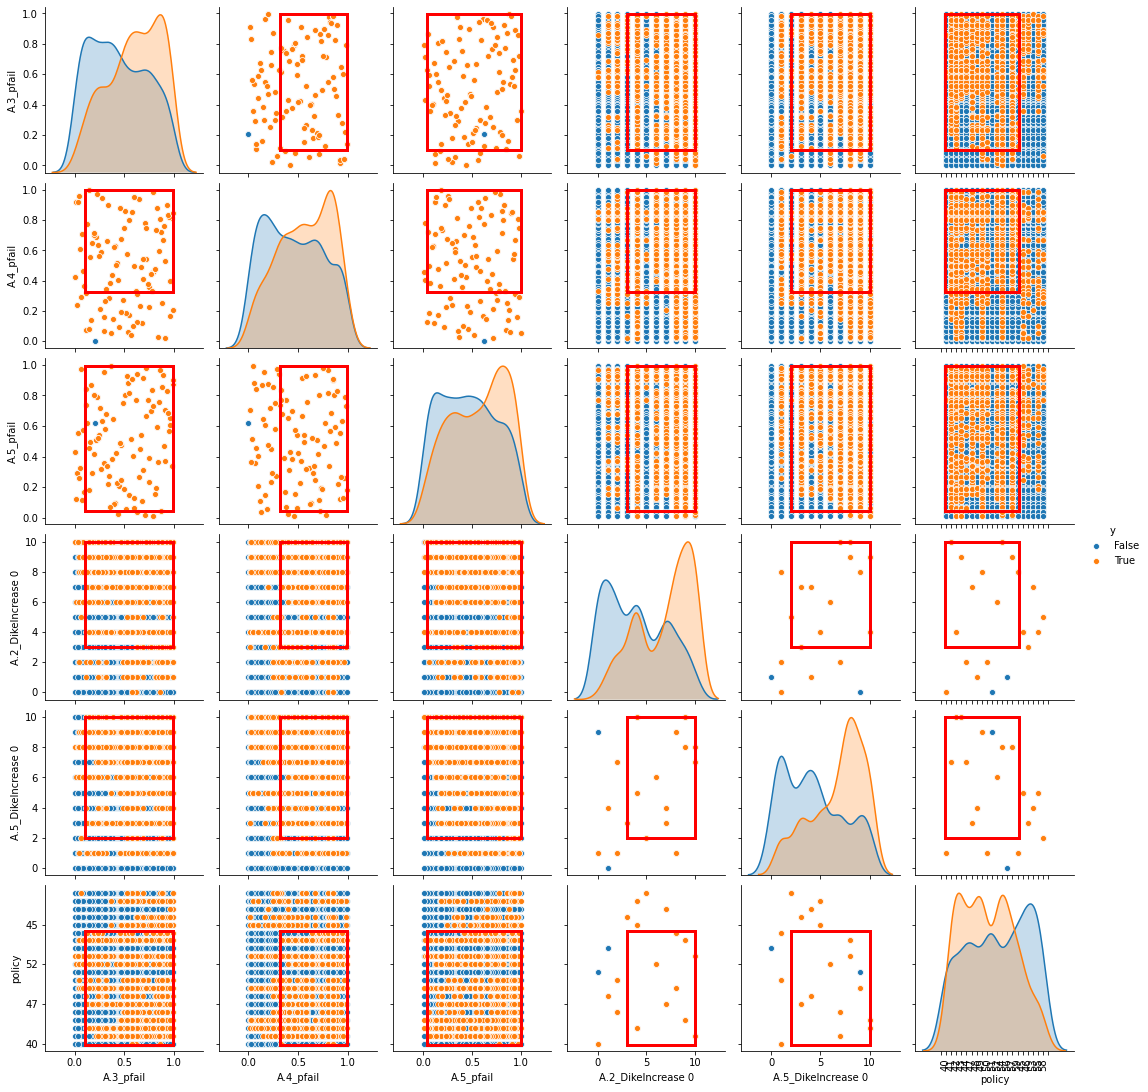

In [59]:
box1.select(20)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

In [60]:
from ema_workbench.analysis import dimensional_stacking

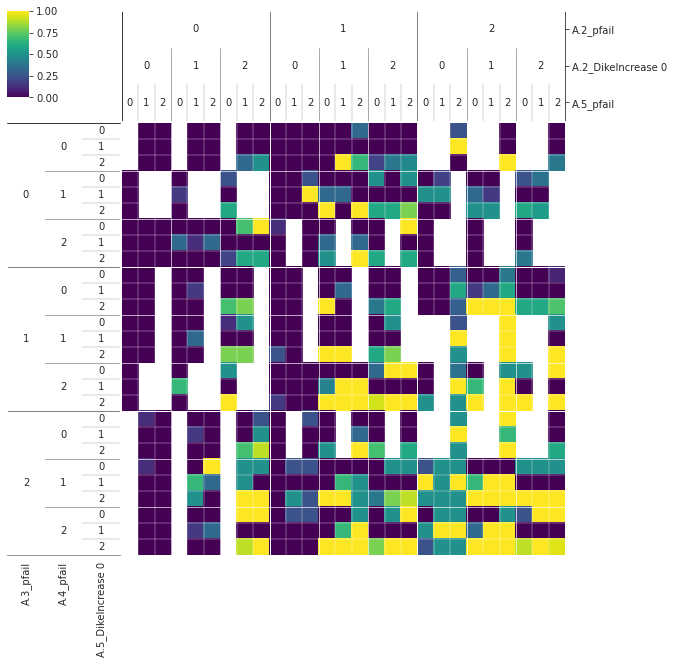

In [61]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

lots of empty spaces and thus we need more experiments

In [62]:
from ema_workbench.analysis import prim

data = df_outcomes["Expected Annual Damage"]

y2 = data <= np.percentile(data, 20)

prim_alg = prim.Prim(experiments,y, threshold=0.8, peel_alpha=0.05)
box2 = prim_alg.find_box()

In [63]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.555237
density      0.80625
id                19
mass            0.24
mean         0.80625
res_dim            6
Name: 19, dtype: object

                                                               box 19  \
                                                                  min   
policy              {40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 5...   
A.2_DikeIncrease 0                                                  3   
A.4_pfail                                                    0.277902   
A.3_pfail                                                    0.100627   
A.5_DikeIncrease 0                                                  2   
A.5_pfail                                                   0.0407416   

                                                                       \
                                                                  max   
policy              {40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 5...   
A.2_DikeIncrease 0                           

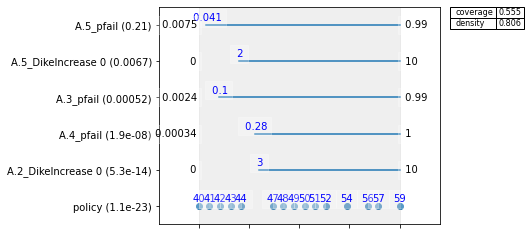

In [67]:
box2.inspect(19)
box2.inspect(19, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

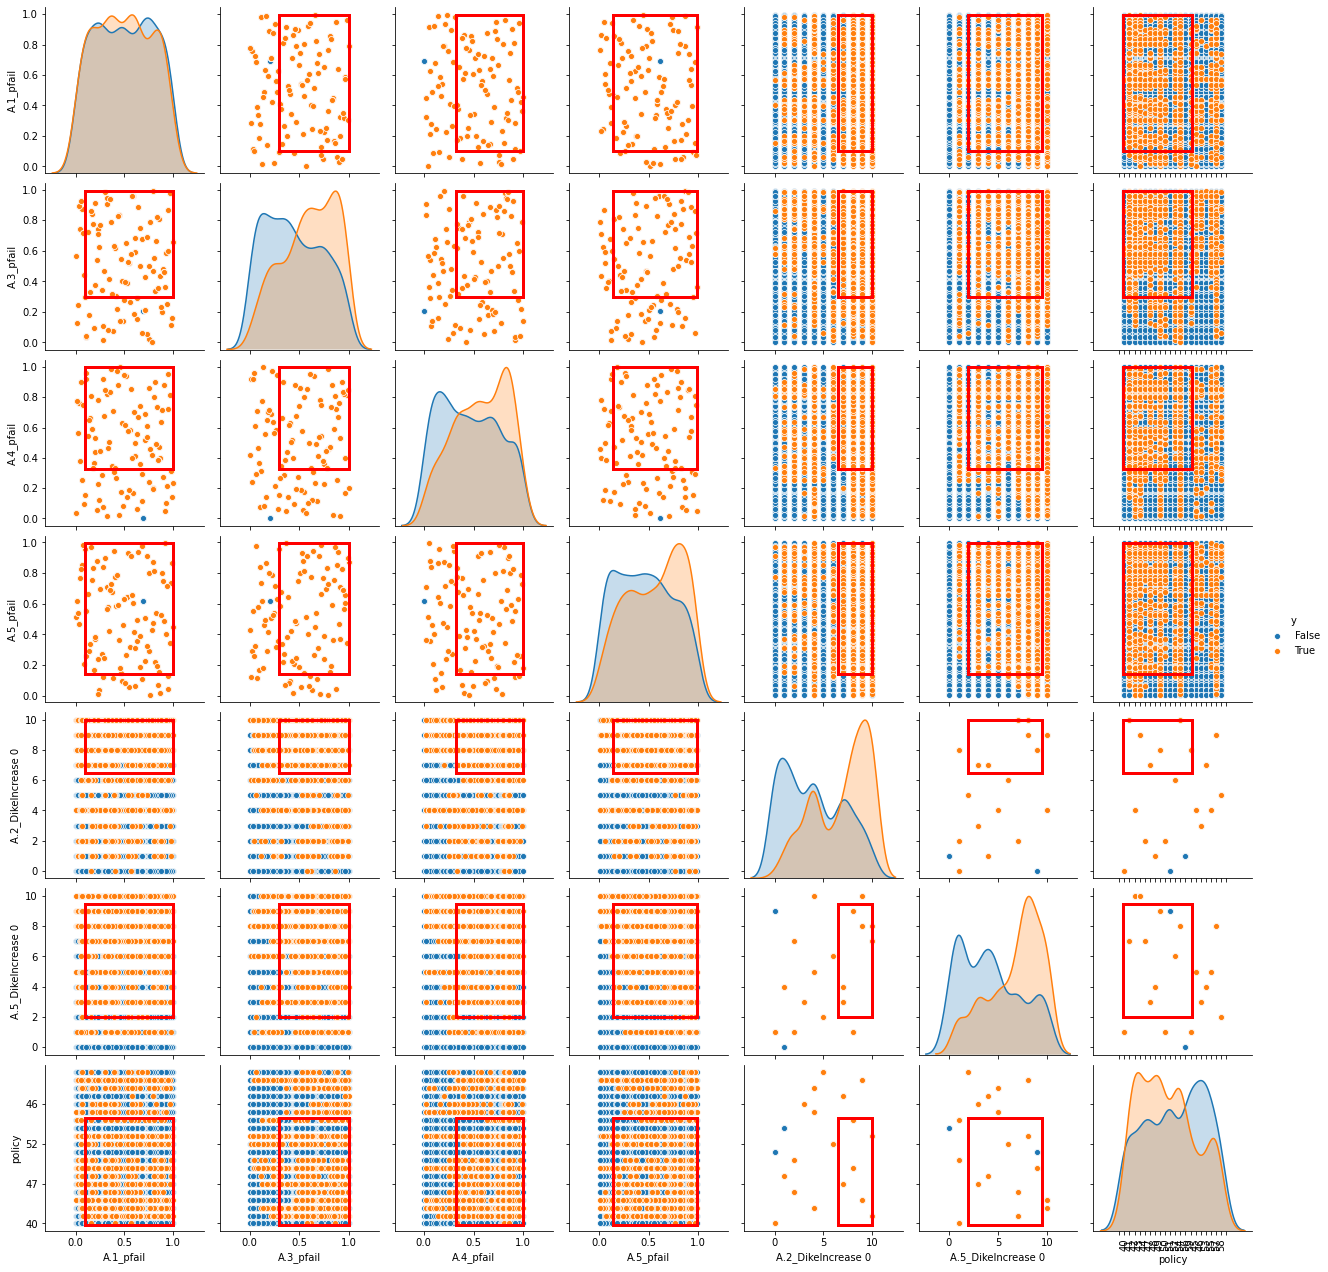

In [66]:
box1.select(19)
fig = box2.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

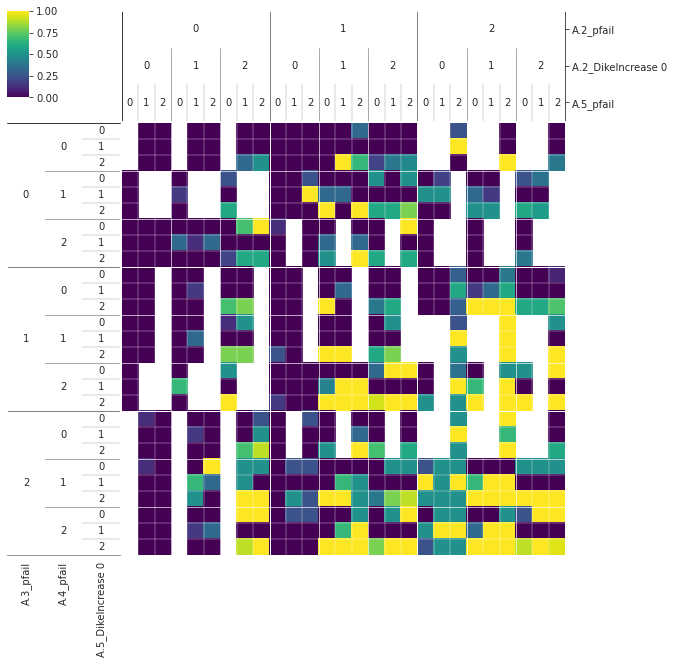

In [68]:
dimensional_stacking.create_pivot_plot(experiments, y2)
plt.show()